In [1]:
# Carregar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carregar o dataset e vizualizar as primeiras 5 linhas.
data = pd.read_csv('ecommerce_dataset_updated.csv')
data.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [4]:
# Obter as informações gerais do dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [5]:
# Verificar valores ausentes por coluna
data.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [6]:
# Verificar e remover valores duplicados
print(f"Linhas duplicadas: {data.duplicated().sum()}")
data = data.drop_duplicates()

Linhas duplicadas: 0


In [7]:
# Remover os espaços no inicio e no final dos nomes das colunas
data.columns = data.columns.str.strip()


In [8]:
# Ajustar formatos de colunas, Se houver colunas de datas ou valores mal formatados, ajustamos:
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'], format='%d-%m-%Y')


In [9]:
# Verificar os primeiros valores únicos da coluna
print(data['Purchase_Date'].unique())

<DatetimeArray>
['2024-11-12 00:00:00', '2024-02-09 00:00:00', '2024-09-01 00:00:00',
 '2024-04-01 00:00:00', '2024-09-27 00:00:00', '2024-08-08 00:00:00',
 '2024-03-28 00:00:00', '2024-05-29 00:00:00', '2024-02-26 00:00:00',
 '2024-01-11 00:00:00',
 ...
 '2024-04-20 00:00:00', '2024-01-30 00:00:00', '2024-04-15 00:00:00',
 '2024-01-25 00:00:00', '2024-06-06 00:00:00', '2024-03-30 00:00:00',
 '2024-01-26 00:00:00', '2024-07-12 00:00:00', '2024-08-12 00:00:00',
 '2024-07-06 00:00:00']
Length: 326, dtype: datetime64[ns]


In [10]:
# Conferir o resultado da conversão
print(data['Purchase_Date'].head())


0   2024-11-12
1   2024-02-09
2   2024-09-01
3   2024-04-01
4   2024-09-27
Name: Purchase_Date, dtype: datetime64[ns]


In [11]:
# Converter a coluna 'Purchase_Date' para o formato datetime
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'])
data['Purchase_Date'].head()


0   2024-11-12
1   2024-02-09
2   2024-09-01
3   2024-04-01
4   2024-09-27
Name: Purchase_Date, dtype: datetime64[ns]

In [12]:
#Realizar a Análise Explorando as Colunas Existentes
# Confirmar que os valores necessários estão presentes
print(data[['Final_Price(Rs.)', 'Category']].head())

   Final_Price(Rs.)  Category
0             31.05    Sports
1            186.23  Clothing
2            237.76    Sports
3            129.89      Toys
4            195.84    Beauty


In [13]:
# Analisar receita por categoria
categoria_receita = data.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending=False)
categoria_receita

Category
Clothing          115314.84
Books             111149.35
Home & Kitchen    110328.08
Sports            108518.79
Toys              107289.69
Beauty            104215.10
Electronics       100462.23
Name: Final_Price(Rs.), dtype: float64

In [14]:
# Agrupar por método de pagamento e calcular receita total
metodos_pagamento_receita = data.groupby('Payment_Method')['Final_Price(Rs.)'].sum().sort_values(ascending=False)
metodos_pagamento_receita

Payment_Method
Credit Card         156018.02
UPI                 154684.81
Debit Card          153362.26
Net Banking         146804.40
Cash on Delivery    146408.59
Name: Final_Price(Rs.), dtype: float64

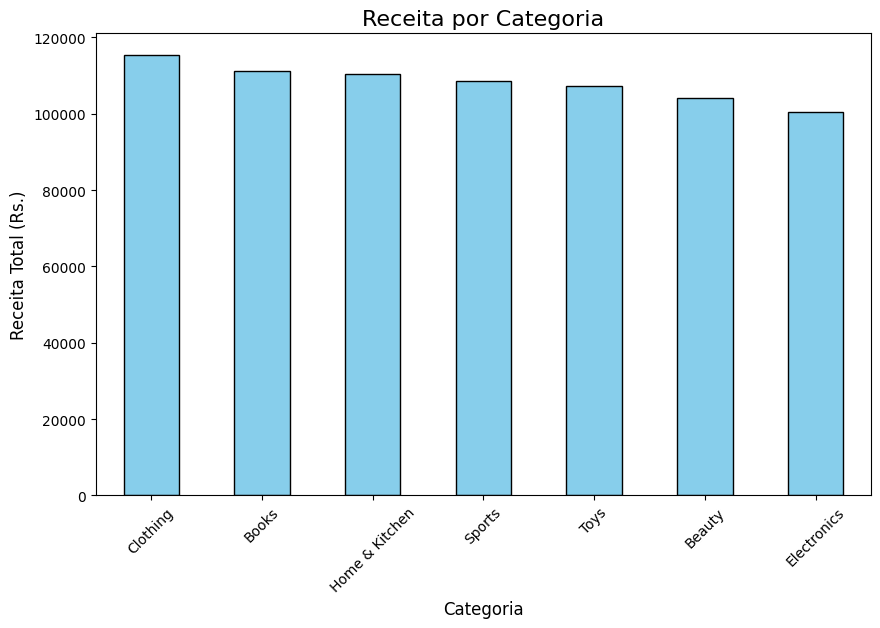

In [15]:
# Vizualizações Atualizadas por categoria

# Gráfico de barras para categorias mais lucrativas
categoria_receita.plot(kind='bar', color='skyblue',edgecolor='black',figsize=(10,6))
plt.title('Receita por Categoria',fontsize=16)
plt.xlabel('Categoria',fontsize=12)
plt.ylabel('Receita Total (Rs.)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

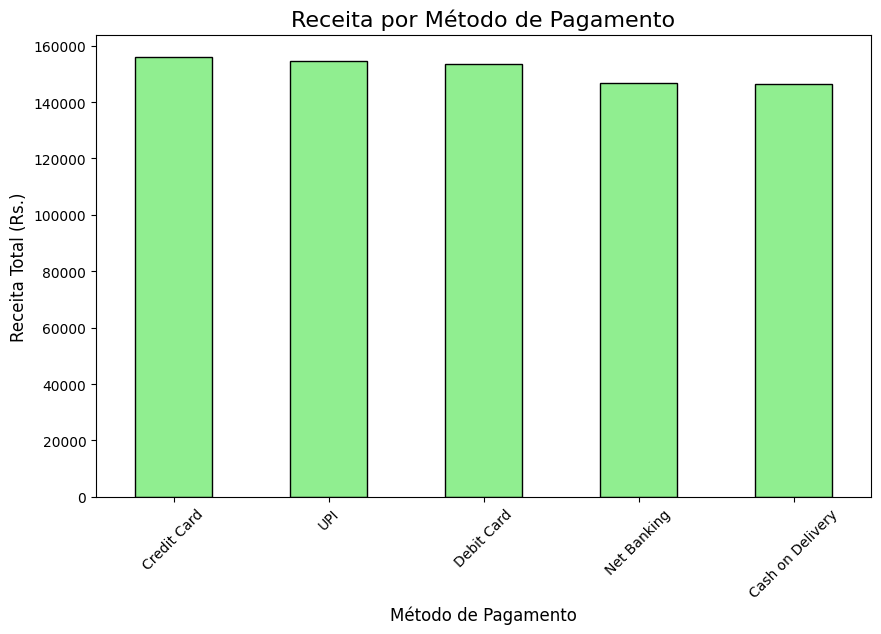

In [16]:
# Receita por método de pagamento

metodos_pagamento_receita.plot(kind='bar', color='lightgreen', edgecolor='black', figsize=(10, 6))
plt.title('Receita por Método de Pagamento', fontsize=16)
plt.xlabel('Método de Pagamento', fontsize=12)
plt.ylabel('Receita Total (Rs.)', fontsize=12)
plt.xticks(rotation=45)
plt.show()